# Importing data and packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm 

#Set up all the columns to display
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')


#import different nlp packages
import nltk
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

In [2]:
# Import files
# business = pd.read_csv('~/yelp/business.csv')
# business_attribute = pd.read_csv('~/yelp/business_attributes.csv')
# business_hours = pd.read_csv('~/yelp/business_hours.csv')
# checkin = pd.read_csv('~/yelp/checkin.csv')
# tip = pd.read_csv('~/yelp/tip.csv')

#import big file review
# review = pd.read_csv('C:/Users/Terrance/Desktop/yelp/review.csv')

## import the review data for 2015- 2017
# review1 = pd.read_csv('cleaned_data/review_15_17.csv')

#import the north america restaurant review for 2015-2017
# review_nora = pd.read_csv('cleaned_data/review_nora.csv')

#import the north america restaurant review for 2015-2017
# review_nora_cleaned = pd.read_csv('~/yelp/cleaned_data/review_nora_cleaned_2019-11-29.csv')

#import the final review files
df = pd.read_csv('~/yelp/cleaned_data/review_final.csv')

In [160]:
checkin.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


In [150]:
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [5]:
review1.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text
0,0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...
1,1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...
2,2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...
3,3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...
4,4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...


In [4]:
#import big file user
user = pd.read_csv('C:/Users/Terrance/Desktop/yelp/user.csv')

In [8]:
user.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,3.70,0,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,2.00,0,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,3.45,0,0,0,0,0,0,0,0,0,1,0


# Data Cleaning

## Cleaning data for review files

### Status: Done <br>
Steps Completed:
    - change date formate
    - select only 2015-2017

### Final variable: review1. import from reivew_15_17.csv

In [ ]:
# # change date from object to date time
# review['date'] = pd.to_datetime(review['date'], format = '%Y-%m-%d')

# #sanity check
# review['date'][0]

In [ ]:
# #check how many reviews in each year
# pd.DatetimeIndex(review['date']).year.value_counts()

In [ ]:
# #select only reviews after 2015
# review1 = review[(review['date']>="2015")]

In [34]:
# #check on how many reviews in 2015, 2016, and 2017
# pd.DatetimeIndex(review1['date']).year.value_counts()

2017    1128518
2016    1052916
2015     911487
Name: date, dtype: int64

In [35]:
# #export the review1 to csv

# review1.to_csv('review_15_17.csv')

In [38]:
# review1.shape

(3092921, 6)

In [ ]:
# check on missing values
review1.isnull().sum()

## Cleaning data for business files. 

### Status: Done
Steps Completed: 
    - Filter out food and restaurant category
    - Filter out north america by state abbv
    - select review1 with only north amercia restaurant from previous steps by business id
      

### Final variable: review_nora

In [9]:
#filter only restuant and food from all business

business_filter = business[(business['categories'].str.contains("Food",regex=True))|
         (business['categories'].str.contains("Restaurant",regex=True))]

#sanity check
display(business.shape)
display(business_filter.shape)

(174567, 13)

(69079, 13)

In [10]:
#filter out North America Only
#check on different locations for the business
business_filter['state'].value_counts()

ON     16845
AZ     13826
NV      9263
OH      6031
QC      5941
NC      4969
PA      4686
BW      2023
WI      1984
EDH     1906
IL       786
SC       291
MLN      120
HLD       76
CHE       75
NYK       71
FIF       34
ELN       32
C         22
WLN       21
NY        12
01        10
NI        10
ST         8
VS         6
ESX        4
IN         3
BY         3
CO         2
GLG        2
XGL        2
CA         1
RCC        1
B          1
6          1
3          1
WHT        1
FLN        1
AK         1
ABE        1
30         1
PKN        1
VA         1
ZET        1
HU         1
KHL        1
Name: state, dtype: int64

In [27]:
#get only US and canada business

#set up list contains only north america state
state_abbv = pd.read_csv('data/state_abbr.csv')

#get north amercia business only from business_filter
business_nora = business_filter[business_filter['state'].isin(state_abbv['Code'])]

state_count = business_nora['state'].value_counts()
# state_count.to_csv('state_count.csv')


In [33]:
# Select north america reviews only based on business_nora['business_id']
review_nora = review1[review1['business_id'].isin(business_nora['business_id'])]

display(review_nora.shape)
display(review1.shape)

(2027121, 7)

(3092921, 7)

In [33]:
# drop duplicated index columns
review_nora = review_nora.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

#Export review_nora to csv
review_nora.to_csv('cleaned_data/review_nora.csv')

In [14]:
#remove "" from name column.


# number_reviews = business_nora[['name','stars','review_count','latitude', 'longitude']]

# number_reviews['name'] = number_reviews['name'].apply(lambda x : x.replace('"',''))

# number_reviews.to_csv('number_reviews.csv')

In [15]:
# ON = business_nora[(business_nora['stars']==5.0)][['name','review_count','stars']]

# ON = ON.sort_values(by='review_count', ascending=False)

# Top_20 = ON.head(20)
# Top_20.to_csv('top20.csv')

<Figure size 1440x720 with 0 Axes>

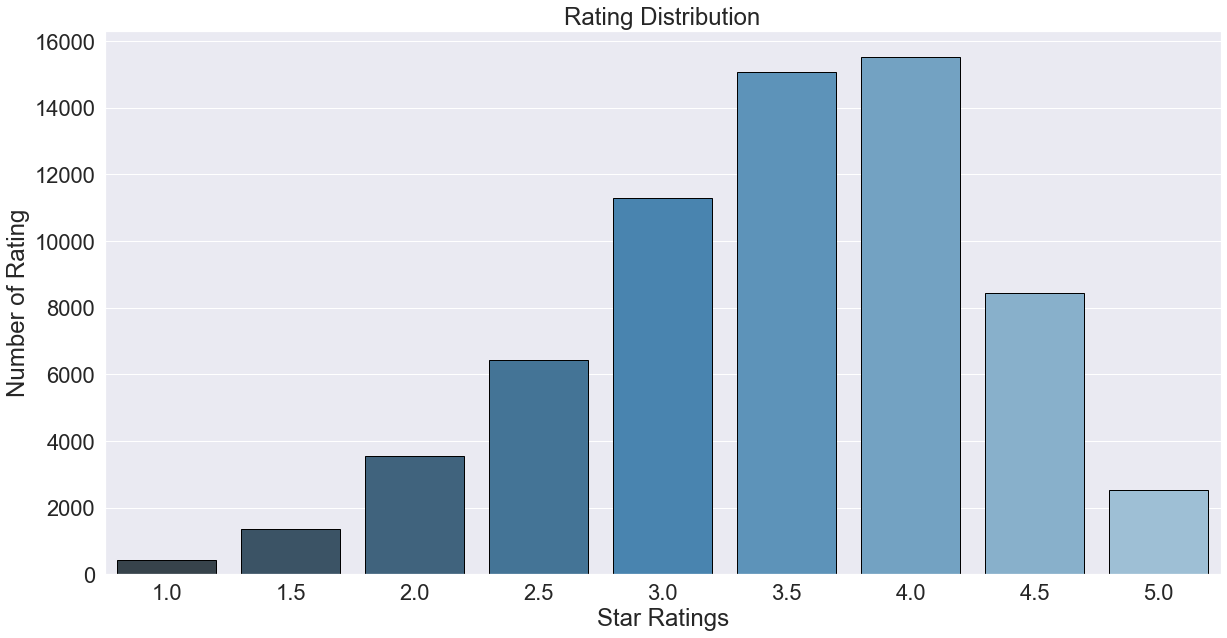

In [18]:
#plot out number of stars distribution 
sns.set(font_scale=15)
sns.set(style = 'darkgrid')
plt.figure(figsize=(20,10))
sns.set(font_scale=2.0)
plt.figure(figsize=(20,10))
sns.countplot(number_reviews['stars'], edgecolor='black', palette = 'Blues_d')
plt.title('Rating Distribution')
plt.ylabel('Number of Rating')
plt.xlabel('Star Ratings')

plt.show()

## Clean Text review in review_nora

### Status: Done

    1. Tokenized the text
    2. Change to lower character for each tokens
    3. Remove stopwords 
    4. Remove punctuation 
    5. Untokenized the text 
    6. Unlist each row from list of strings to strings
    
### Final Variables: review_nora_cleaned
    

In [8]:
review_nora = pd.read_csv('~/yelp/review_nora.csv')
review_nora.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text
0,0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...
1,1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...
2,2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...
3,3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...
4,4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...


In [5]:
#import different nlp packages
import nltk
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

In [6]:
#define function to remove stop words
def remove_stopwords(list_of_tokens):
    '''
    Remove English Stop Words
    '''
    
    cleaned_tokens = []
    for token in list_of_tokens:
        if token in ENGLISH_STOP_WORDS: continue
        cleaned_tokens.append(token)
        
    return cleaned_tokens

In [7]:
#define function to remove punctuation, character less than 2, remove extra''
def remove_punctuation(list_of_tokens):
    '''
    1. Remove Punctuation
    2. Remove character less than 2
    3. Remove extra '' in the list
    
    '''
    cleaned_tokens = []
    for word in list_of_tokens:
          
        #remove punctuation
        for punctuation in string.punctuation:
            word = word.replace(punctuation,'')
            
            #remove character less than 2
            word = re.sub(r'\b\w{1,2}\b', '', word)
            
        #append the word to cleaned token
        cleaned_tokens.append(word)
        
        #remove extra '' in the list
        while('' in cleaned_tokens):
            cleaned_tokens.remove('')
            
    return cleaned_tokens

In [8]:
#define a function to untokenlize the tokens
def the_untokenizer(token_list):
    '''
    Untokenize the token back to string
    '''
    return " ".join(token_list)

In [9]:
#define a function to cleaning_out_texts to combine functions:tokenize, remove_stopwords, remove_punctuation, the_untokenizer

def cleaning_out_texts(text):
    '''
    1. Tokenized the text
    2. Change to lower character for each tokens
    3. Apply remove_stopwords function defined above
    4. Apply remove_punctuation function defined above
    5. Apply the_untokenizer function defined above
    6. Returned cleaned text
    
    '''
    cleaned_text = []
    
    tokenizer_list = word_tokenize(text)
    
    lower_word = []
    for word in tokenizer_list:
        
        word = word.lower()
        
        lower_word.append(word)
    
    removed_stopwords_list = remove_stopwords(lower_word)
        
    removed_punctuation_list = remove_punctuation(removed_stopwords_list)
                
    back_to_string = the_untokenizer(removed_punctuation_list)
        
    cleaned_text.append(back_to_string)
        
    return cleaned_text       

In [21]:
review_nora['cleaned_text']= review_nora['text'].apply(cleaning_out_texts)
review_nora.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text,cleaned_text
0,0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,[super simple place amazing nonetheless serve ...
1,1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,[small unassuming place changes menu cool deco...
2,2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,[lester located beautiful neighborhood 1951 kn...
3,3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,[love coming yes place needs floor swept peanu...
4,4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,[chocolate almond croissant amazing light butt...


In [10]:
review_nora_cleaned['cleaned_text'].head()

0    super simple place amazing nonetheless serve t...
1    small unassuming place changes menu cool decor...
2    lester located beautiful neighborhood 1951 kno...
3    love coming yes place needs floor swept peanut...
4    chocolate almond croissant amazing light butte...
Name: cleaned_text, dtype: object

In [11]:
# define a function to remove extra '' and unpack the list

def unlist(list):
    return str(list).strip("[],''")

In [7]:
review_nora_cleaned.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'date', 'text',
       'cleaned_text'],
      dtype='object')

In [33]:
#apply the unlist function to cleaned_text
review_nora_cleaned['cleaned_text']=review_nora_cleaned['cleaned_text'].apply(unlist)

In [6]:
#drop unnecssary columns. the index from previous step
review_nora_cleaned=review_nora_cleaned.drop(['Unnamed: 0','index'], axis=1)

In [62]:
print(review_nora_cleaned.index)

RangeIndex(start=0, stop=2027121, step=1)


In [88]:
#remove NA value. only 16. so remove have no impact
review_nora_cleaned = review_nora_cleaned.dropna(axis=0).reset_index()

review_nora_cleaned['cleaned_text'].isnull().sum()

0

In [94]:
#export the updated review_nora_cleaned 2019-11-28 to csv
review_nora_cleaned.to_csv('~/yelp/review_nora_cleaned_2019_11_28.csv')

## Clean checkin files

### Status: Done

    1. Aggregate number of checkins by business id 
    

### Final Variable Name: aggregate_checkins

In [181]:
checkin.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


In [183]:
aggregate_checkins = checkin.groupby('business_id').agg({'checkins':['sum']}).reset_index()
aggregate_checkins.head()

,business_id,checkins
,,sum
0,--6MefnULPED_I942VcFNA,139
1,--7zmmkVg-IMGaXbuVd0SQ,153
2,--8LPVSo5i0Oo61X01sV9A,1
3,--9QQLMTbFzLJ_oT-ON3Xw,33
4,--9e1ONYQuAa-CB_Rrw7Tw,2568


# Convert Words to Numbers

## Status: Done

    1. Using Textblob to get the polarity and subjectivity
    2. Get the length of each review text
    3. Using VADER Packages to get the postive, neutral, negative sentiment in each review

### Using Textblob to get the polarity and subjectivity in the sentence: Done


In [11]:
#Using Textblob to get polarity and subjectivity by sentence
from textblob import TextBlob

polarity = []
subjectivity = []

for n in range(review_nora_cleaned.shape[0]):
    
    polar_score = TextBlob(review_nora_cleaned['cleaned_text'][n]).sentiment[0]
    subject_score = TextBlob(review_nora_cleaned['cleaned_text'][n]).sentiment[1]
    
    polarity.append(polar_score)
    subjectivity.append(subject_score)

review_nora_cleaned['polarity']=polarity
review_nora_cleaned['subjectivity']=subjectivity

In [13]:
#save the cleaned version to csv
review_nora_cleaned.to_csv('~/yelp/cleaned_data/review_nora_cleaned_2019-11-29.csv', index=False)

In [12]:
review_nora_cleaned.head()

,review_id,user_id,business_id,stars,date,text,cleaned_text,polarity,subjectivity
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,super simple place amazing nonetheless serve t...,0.327083,0.605952
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,small unassuming place changes menu cool decor...,0.342857,0.571429
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,lester located beautiful neighborhood 1951 kno...,0.425000,0.525000
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,love coming yes place needs floor swept peanut...,0.070000,0.495385
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,chocolate almond croissant amazing light butte...,0.500000,0.700000


### Get the length of each review: Done


In [19]:
# Testing on getting length of words in the review
a= review_nora_cleaned['cleaned_text'][0]
display(a)
len(a.split())


'super simple place amazing nonetheless serve thing started bologna salami sandwich mustard staff helpful friendly'

15

In [24]:
# getting the length of words for each row
review_length = []

for n in range(review_nora_cleaned.shape[0]):
    
    length = len(review_nora_cleaned['cleaned_text'][n].split())
    
    review_length.append(length)
    

#sanity check 
display(review_nora_cleaned.shape)
display(len(review_length))
    

(2027105, 9)

2027105

In [25]:
# Append the review_length to the review_nora_cleaned df
review_nora_cleaned['review_length']= review_length

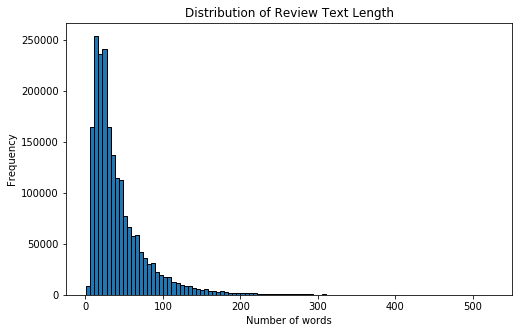

In [44]:
# Visualize the distribution of review_length

plt.figure(figsize=(8,5))
plt.hist(review_length, edgecolor='black', bins =100)
plt.title('Distribution of Review Text Length')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

In [45]:
# save the updated files to csv
review_nora_cleaned.to_csv('~/yelp/cleaned_data/review_nora_cleaned_2019-12-01.csv', index=False)

### Change the text to sentiment using vader package


VADER Sentiment Analysis
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labelled according to their semantic orientation as either positive or negative.
VADER has been found to be quite successful when dealing with social media texts, NY Times editorials, movie reviews, and product reviews. This is because VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.
It is fully open-sourced under the MIT License. The developers of VADER have used Amazon’s Mechanical Turk to get most of their ratings, You can find complete details on their Github Page.

ADER has a lot of advantages over traditional methods of Sentiment Analysis, including:
It works exceedingly well on social media type text, yet readily generalizes to multiple domains
It doesn’t require any training data but is constructed from a generalizable, valence-based, human-curated gold standard sentiment lexicon
It is fast enough to be used online with streaming data, and
It does not severely suffer from a speed-performance tradeoff.

The Positive, Negative and Neutral scores represent the proportion of text that falls in these categories. This means our sentence was rated as 67% Positive, 33% Neutral and 0% Negative. Hence all these should add up to 1.
The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive). In the case above, lexicon ratings for andsupercool are 2.9and respectively1.3. The compound score turns out to be 0.75 , denoting a very high positive sentiment.

compound score metric

positive sentiment: compound score >= 0.05
neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
negative sentiment: compound score <= -0.05

In [52]:
#import vader packages
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [92]:
# getting sentiment ratings from the text reviews and append each row as dictionary in the list l1
l1=[]
for j in range(review_nora_cleaned.shape[0]):
    l1.append(analyser.polarity_scores(review_nora_cleaned['cleaned_text'][j]))



In [93]:
# Sanity check on l1
len(l1)

2027105

In [102]:
#change l1 to df and append to original review_nora_cleaned df

l1_df=pd.DataFrame(l1, index= range(len(l1)))

review_nora_cleaned[['negative','neutral','positive','compound_score']]= l1_df

In [110]:
#Sanity check
review_nora_cleaned.head(2)

,review_id,user_id,business_id,stars,date,text,cleaned_text,polarity,subjectivity,review_length,negative,neutral,positive,compound_score
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,super simple place amazing nonetheless serve t...,0.327083,0.605952,15,0.0,0.445,0.555,0.9287
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,small unassuming place changes menu cool decor...,0.342857,0.571429,41,0.0,0.802,0.198,0.8542


In [122]:
#update the csv files

review_nora_cleaned.to_csv('~/yelp/cleaned_data/review_nora_cleaned_2019-12-01.csv', index=False)

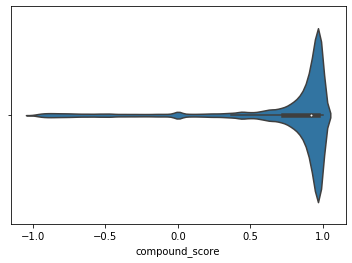

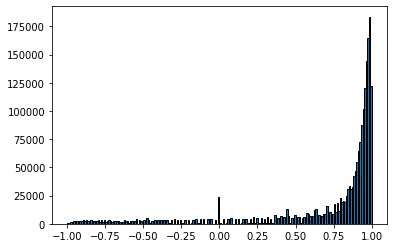

In [107]:
# Explore the distribution of compound_score before grouping to Positive, Negative, and Netural

plt.figure()
sns.violinplot(review_nora_cleaned['compound_score'])
plt.show()

plt.figure()
plt.hist(review_nora_cleaned['compound_score'], edgecolor='black', bins=200)
plt.show()

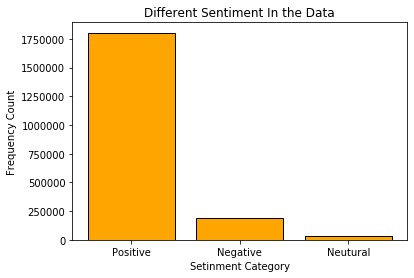

In [121]:
# get value count for positive, netural, and negative reviews in the data

pos = (review_nora_cleaned['compound_score']>=0.05).sum()
neg = (review_nora_cleaned['compound_score']<=-0.05).sum()
neu = ((review_nora_cleaned['compound_score']>-0.05) & (review_nora_cleaned['compound_score']<0.05)).sum()

sentiment = ['Positive','Negative','Neutural']
count =[pos, neg, neu]
plt.figure()
plt.bar(sentiment, count,edgecolor = 'black', color='orange')
plt.title('Different Sentiment In the Data')
plt.xlabel('Setinment Category')
plt.ylabel('Frequency Count')
plt.show()

In [ ]:
#combined everything into big df. 

# Get the word cloud for each of the star ratings

## Status: in progress

    1. Parse out each star ratings with its related cleaned text
    2. Word Cloud for each ratings. 

In [123]:
#count how many for each star count
review_nora_cleaned['stars'].value_counts()

5    867766
4    477343
1    259209
3    242712
2    180075
Name: stars, dtype: int64

In [124]:
# Separate the stars and the text based on the ratings
star_5 = review_nora_cleaned[review_nora_cleaned['stars']==5]['cleaned_text'].reset_index(drop=True)
star_4 = review_nora_cleaned[review_nora_cleaned['stars']==4]['cleaned_text'].reset_index(drop=True)
star_3 = review_nora_cleaned[review_nora_cleaned['stars']==3]['cleaned_text'].reset_index(drop=True)
star_2 = review_nora_cleaned[review_nora_cleaned['stars']==2]['cleaned_text'].reset_index(drop=True)
star_1 = review_nora_cleaned[review_nora_cleaned['stars']==1]['cleaned_text'].reset_index(drop=True)

In [130]:
# Combine text from each row to one single text
star5text = star_5.str.cat(sep=' ')

In [ ]:
from wordcloud import WordCloud

cloud = WordCloud(background_color="white", max_words=100, max_font_size=50).generate(star5text)
plt.figure(figsize=(20,20))
plt.imshow(cloud, interpolation ='bilinear')
plt.axis('off')
plt.show()

# Combining df

## Create new df by combining different data

### Status: Done

### Final Variable: df

Combined review_nora_cleaned, aggregate_checkins, business_name, is_open from business to one single files

In [200]:
review_nora_cleaned.head(2)

,review_id,user_id,business_id,stars,date,text,cleaned_text,polarity,subjectivity,review_length,negative,neutral,positive,compound_score
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,super simple place amazing nonetheless serve t...,0.327083,0.605952,15,0.0,0.445,0.555,0.9287
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,small unassuming place changes menu cool decor...,0.342857,0.571429,41,0.0,0.802,0.198,0.8542


In [205]:
#subset business_id, name, review count, is_open, stars from business files
business_subset = business[['business_id','name', 'review_count', 'is_open','stars']]
business_subset.head(2)

,business_id,name,review_count,is_open,stars
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",22,1,4.0
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",11,1,3.0


In [206]:
#remove "" in the name column for busines_subset
business_subset['name']= business_subset['name'].apply(lambda x : x.replace('"',''))

business_subset.head(2)

,business_id,name,review_count,is_open,stars
0,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,22,1,4.0
1,He-G7vWjzVUysIKrfNbPUQ,Stephen Szabo Salon,11,1,3.0


In [199]:
aggregate_checkins.head(2)

,business_id,checkins
,,sum
0,--6MefnULPED_I942VcFNA,139
1,--7zmmkVg-IMGaXbuVd0SQ,153


In [208]:
# merge review_nora_cleaned with business_subset
df = pd.merge(review_nora_cleaned, business_subset, on = 'business_id', how='left')

In [210]:
# merge df with aggregate_checkins
df = pd.merge(df, aggregate_checkins, on = 'business_id', how='left')

df.head()

,review_id,user_id,business_id,stars_x,date,text,cleaned_text,polarity,subjectivity,review_length,negative,neutral,positive,compound_score,name,review_count,is_open,stars_y,"(checkins, sum)"
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,super simple place amazing nonetheless serve t...,0.327083,0.605952,15,0.000,0.445,0.555,0.9287,Wilensky's,84,1,4.0,119.0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,small unassuming place changes menu cool decor...,0.342857,0.571429,41,0.000,0.802,0.198,0.8542,Tuck Shop,50,1,4.5,62.0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,lester located beautiful neighborhood 1951 kno...,0.425000,0.525000,24,0.000,0.855,0.145,0.5994,Lester's Deli,70,1,4.0,72.0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,love coming yes place needs floor swept peanut...,0.070000,0.495385,44,0.053,0.716,0.231,0.8658,Five Guys,61,1,3.5,89.0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,chocolate almond croissant amazing light butte...,0.500000,0.700000,17,0.000,0.667,0.333,0.8176,Maison Christian Faure,397,1,4.5,755.0


In [215]:
# rename the column
df.columns

Index([        'review_id',           'user_id',       'business_id',
                 'stars_x',              'date',              'text',
            'cleaned_text',          'polarity',      'subjectivity',
           'review_length',          'negative',           'neutral',
                'positive',    'compound_score',              'name',
            'review_count',           'is_open',           'stars_y',
       ('checkins', 'sum')],
      dtype='object')

In [220]:
df.columns=['review_id',           'user_id',       'business_id', \
            'star_individual',        'date',              'text', \
            'cleaned_text',          'polarity',      'subjectivity', \
           'review_length',          'negative',           'neutral', \
                'positive',    'compound_score',              'name', \
            'review_count',           'is_open',           'business_stars', \
           'num_checkins']

In [222]:
df.to_csv('~/yelp/cleaned_data/review_final.csv', index=False)
df.head(2)

,review_id,user_id,business_id,star_individual,date,text,cleaned_text,polarity,subjectivity,review_length,negative,neutral,positive,compound_score,name,review_count,is_open,business_stars,num_checkins
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,super simple place amazing nonetheless serve t...,0.327083,0.605952,15,0.0,0.445,0.555,0.9287,Wilensky's,84,1,4.0,119.0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,small unassuming place changes menu cool decor...,0.342857,0.571429,41,0.0,0.802,0.198,0.8542,Tuck Shop,50,1,4.5,62.0


In [3]:
df.head()

,review_id,user_id,business_id,star_individual,date,text,cleaned_text,polarity,subjectivity,review_length,negative,neutral,positive,compound_score,name,review_count,is_open,business_stars,num_checkins
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,super simple place amazing nonetheless serve t...,0.327083,0.605952,15,0.000,0.445,0.555,0.9287,Wilensky's,84,1,4.0,119.0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,small unassuming place changes menu cool decor...,0.342857,0.571429,41,0.000,0.802,0.198,0.8542,Tuck Shop,50,1,4.5,62.0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,lester located beautiful neighborhood 1951 kno...,0.425000,0.525000,24,0.000,0.855,0.145,0.5994,Lester's Deli,70,1,4.0,72.0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,love coming yes place needs floor swept peanut...,0.070000,0.495385,44,0.053,0.716,0.231,0.8658,Five Guys,61,1,3.5,89.0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,chocolate almond croissant amazing light butte...,0.500000,0.700000,17,0.000,0.667,0.333,0.8176,Maison Christian Faure,397,1,4.5,755.0


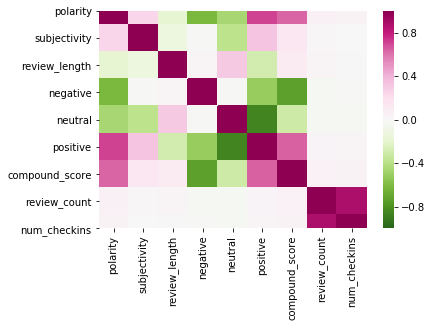

,polarity,subjectivity,review_length,negative,neutral,positive,compound_score,review_count,num_checkins
polarity,1.000000,0.245347,-0.188277,-0.613318,-0.460344,0.715677,0.637224,0.055156,0.044022
subjectivity,0.245347,1.000000,-0.124951,-0.010044,-0.381878,0.334163,0.135592,0.017107,0.007665
review_length,-0.188277,-0.124951,1.000000,0.028958,0.312269,-0.284045,0.111392,0.025378,0.010345
negative,-0.613318,-0.010044,0.028958,1.000000,-0.014208,-0.508120,-0.733804,-0.023117,-0.014925
neutral,-0.460344,-0.381878,0.312269,-0.014208,1.000000,-0.853977,-0.304740,-0.026670,-0.027011
positive,0.715677,0.334163,-0.284045,-0.508120,-0.853977,1.000000,0.644340,0.035005,0.031035
compound_score,0.637224,0.135592,0.111392,-0.733804,-0.304740,0.644340,1.000000,0.054417,0.040125
review_count,0.055156,0.017107,0.025378,-0.023117,-0.026670,0.035005,0.054417,1.000000,0.886773
num_checkins,0.044022,0.007665,0.010345,-0.014925,-0.027011,0.031035,0.040125,0.886773,1.000000


In [4]:
# check on coorelations

df_subset =df[['polarity','subjectivity','review_length','negative','neutral','positive', 'compound_score','review_count',
              'num_checkins']]

df_subset_corr = df_subset.corr()

#visulize correlation matrix in heatmap
plt.figure()
sns.heatmap(df_subset_corr, vmin=-1, vmax=1, cmap='PiYG_r')
plt.show()


df_subset_corr

# Modling - Predict business_stars

1. Setting up X and y. Two different y. y1 = business_stars, y2=is_open
2. Train test split

In [6]:
df.columns

Index(['review_id', 'user_id', 'business_id', 'star_individual', 'date',
       'text', 'cleaned_text', 'polarity', 'subjectivity', 'review_length',
       'negative', 'neutral', 'positive', 'compound_score', 'name',
       'review_count', 'is_open', 'business_stars', 'num_checkins'],
      dtype='object')

In [ ]:
# Setting up X and y1  - Using sentiment and other numeric data to get business_stars
# y2 is whether the business is still open
# X1 all numeric data. X combine cleaned_text with numeric data, X2 cleaned_text only

X = df[['cleaned_text','polarity', 'subjectivity', 'review_length', \
       'negative', 'neutral', 'positive', 'compound_score','review_count','num_checkins']]

X1 = df[['polarity', 'subjectivity', 'review_length', \
       'negative', 'neutral', 'positive', 'compound_score','review_count','num_checkins']]

X2 = df[['cleaned_text']]

y1 = df['business_stars']

y2 = df['is_open']